In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
init_notebook_mode(connected=True)

In [23]:
data = pd.read_csv('FAO.csv', encoding = "ISO-8859-1")

## Histogram

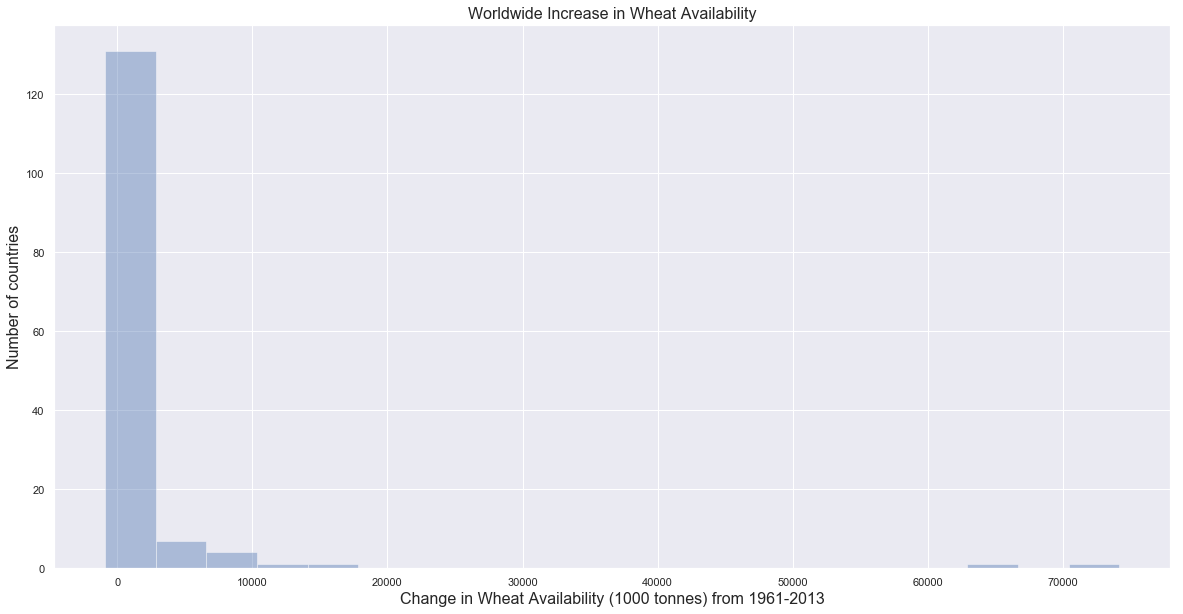

In [15]:
world_wheat_food = data[(data.Element == 'Food') & 
                        (data.Item == 'Wheat and products') &
                        (data.Y2013.notnull()) &
                        (data.Y1961.notnull())].copy().reset_index(drop=True)
world_wheat_food['total_diff'] = world_wheat_food['Y2013'] - world_wheat_food['Y1961']

sns.set(rc={'figure.figsize':(20,10)})
fontdict = {'size':16}
ax = sns.distplot(world_wheat_food['total_diff'], bins=20, kde=False);
plt.xlabel("Change in Wheat Availability (1000 tonnes) from 1961-2013", fontdict=fontdict);
plt.ylabel("Number of countries", fontdict=fontdict);
plt.title('Worldwide Increase in Wheat Availability', fontdict=fontdict);

## Barplot

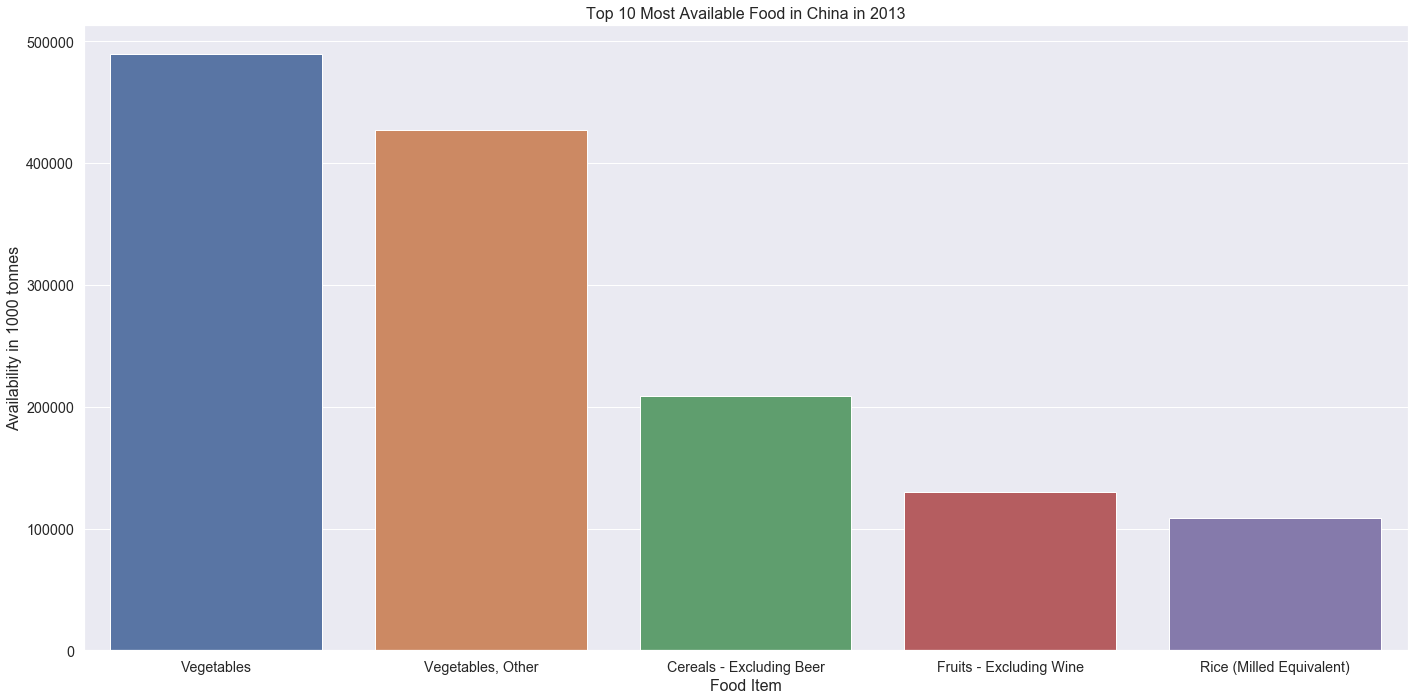

In [16]:
world_wheat_food = data[(data.Element == 'Food') & 
                        (data.Item == 'Wheat and products') &
                        (data.Y2013.notnull()) &
                        (data.Y1961.notnull())].copy().reset_index(drop=True)
world_wheat_food['total_diff'] = world_wheat_food['Y2013'] - world_wheat_food['Y1961']
world_wheat_food.sort_values(by=['total_diff'], inplace=True);
country = world_wheat_food.iloc[-1]['Area']
food_availability_by_top_country = data[(data.Area == country) & (data.Element == 'Food')][['Item', 'Y2013']].reset_index(drop=True).copy()
food_availability_by_top_country.sort_values(by=['Y2013'], inplace=True, ascending=False);
food_availability_by_top_country_top5 = food_availability_by_top_country.head(5)
sns.set(rc={'figure.figsize':(20, 10)}, font_scale=1.3);
fontdict = {'size':16}
ax = sns.barplot(x="Item", y="Y2013", data=food_availability_by_top_country_top5);
plt.xlabel("Food Item", fontdict=fontdict);
plt.ylabel("Availability in 1000 tonnes", fontdict=fontdict);
plt.title('Top 10 Most Available Food in China in 2013', fontdict=fontdict);
plt.tight_layout();

## Boxplot

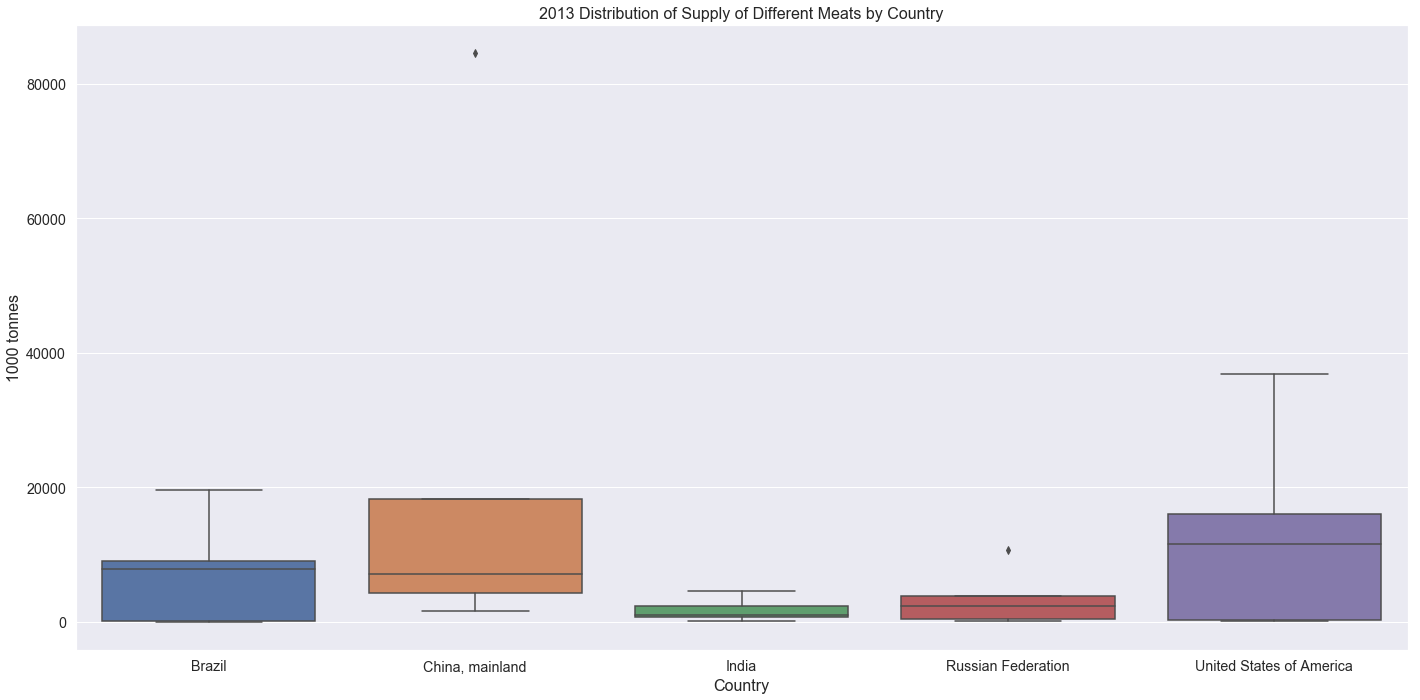

In [26]:
top_countries = data[(data.Element == 'Food') & (data.Y2013.notnull())].\
                        pivot_table(index='Area', values='Y2013', aggfunc='sum').\
                        sort_values(by='Y2013', ascending=False).head(5).index.tolist()
meats = data[data.Item.str.contains("Meat")].Item.unique().tolist()
top_consumers_of_food = data[(data.Element == 'Food') & 
                             (data.Y2013.notnull()) & 
                             (data.Area.isin(top_countries)) &
                             (data.Item.isin(meats))]
sns.set(rc={'figure.figsize':(20, 10)}, font_scale=1.3);
fontdict = {'size':16}
ax = sns.boxplot(x="Area", y="Y2013", data=top_consumers_of_food)
plt.xlabel("Country", fontdict=fontdict);
plt.ylabel("1000 tonnes", fontdict=fontdict);
plt.title('2013 Distribution of Supply of Different Meats by Country', fontdict=fontdict);
plt.tight_layout();

## Scatter Plot

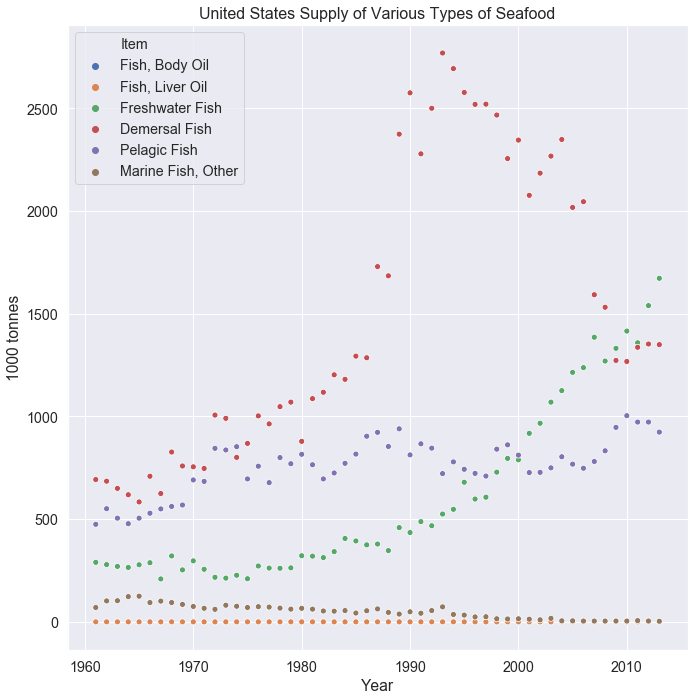

In [24]:
seafood = data[(data.Item.str.contains("Fish")) & (data.Item != 'Fish, Seafood')].Item.unique().tolist()
us_data = data[(data.Area == 'United States of America') & 
               (data.Element == 'Food') &
               (data.Item.isin(seafood))]
sns.set(rc={'figure.figsize':(10, 10)}, font_scale=1.3);
fontdict = {'size':16}
us_data = pd.melt(us_data, id_vars=['Item'], value_vars=data.columns[10:].tolist(), 
                  var_name='Year', value_name='1000 tonnes')
us_data['Year'] = us_data['Year'].apply(lambda x: int(x[1:]))
ax = sns.scatterplot(x="Year", y="1000 tonnes", hue="Item", data=us_data)
plt.title('United States Supply of Various Types of Seafood', fontdict=fontdict);
plt.tight_layout();

## Stacked Area Plot

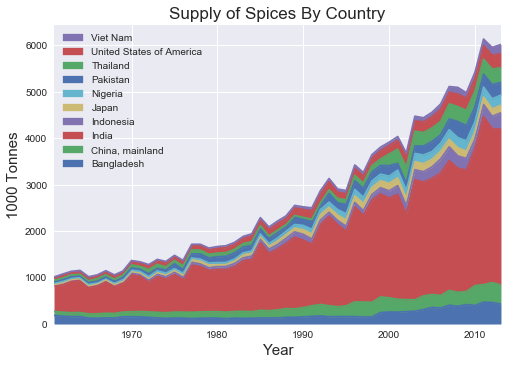

In [37]:
top_countries = data[(data.Element == 'Food') & (data.Item == 'Spices') & (data.Y2013.notnull())].\
                        pivot_table(index='Area', values='Y2013', aggfunc='sum').\
                        sort_values(by='Y2013', ascending=False).head(10).index.tolist()
spices = data[(data.Element == 'Food') & (data.Item == 'Spices') & (data.Area.isin(top_countries))]
sns.set(rc={'figure.figsize':(10, 10)}, font_scale=1.3);
fontdict = {'size':16}
spices = pd.melt(spices, id_vars=['Area'], value_vars=spices.columns[10:].tolist(), 
                  var_name='Year', value_name='1000 tonnes')
spices['Year'] = spices['Year'].apply(lambda x: int(x[1:]))
spices = spices.pivot_table(index='Year', columns='Area', values='1000 tonnes')
plt.style.use('seaborn')
spices.plot.area()
plt.xlabel('Year', fontsize=15)
plt.ylabel('1000 Tonnes', fontsize=15)
plt.title('Supply of Spices By Country',fontsize=17)
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0], reverse=True))
ax.legend(handles, labels)
plt.show()

## Tree Map

In [38]:
top_usa_foods = data[(data.Element == 'Food') & (data.Area == 'United States of America') & (data.Y2013.notnull())].\
                    sort_values(by='Y2013', ascending=False)
foods = top_usa_foods['Item'][1:6].reset_index(drop=True)
values = top_usa_foods['Y2013'][1:6].reset_index(drop=True)

In [41]:
import squarify

x = 0.
y = 0.
width = 100.
height = 100.


normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

color_brewer = ['rgb(166,206,227)','rgb(31,120,180)','rgb(178,223,138)',
                'rgb(51,160,44)','rgb(251,154,153)','rgb(227,26,28)']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = foods[counter],
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) + " (1000 Tonnes)" for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    title=dict(text='Top 5 Most Abundant Foods in the United States')
)

figure = dict(data=[trace0], layout=layout)

py.iplot(figure, filename='squarify-treemap')

/Users/anishdalal/.local/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Bubble Map

In [27]:
rice_consumption = data[(data['Item Code'] == 2805) & (data.Element == 'Food') & (data.Y2013.notnull())].reset_index(drop=True)
rice_consumption['text'] = rice_consumption['Area'] + ' ' + rice_consumption['Y2013'].astype(str) + ' (' + rice_consumption['Unit'] + ')'
rice_consumption.sort_values(by='Y2013', inplace=True, ascending=False);

In [28]:
limits = [(0,2),(3,10),(11,20),(21,50),(50,173)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightblue"]
tiers = ["Tier 1","Tier 2","Tier 3","Tier 4","Tier 5"]
countries = []
scale = 100

for i in range(len(limits)):
    lim = limits[i]
    df_sub = rice_consumption[lim[0]:lim[1]]
    country = go.Scattergeo(
        locationmode = 'country names',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['text'],
        marker = go.scattergeo.Marker(
            size = df_sub['Y2013']/scale,
            color = colors[i],
            line = go.scattergeo.marker.Line(
                width=0.5, color='rgb(40,40,40)'
            ),
            sizemode = 'area'
        ),
        name = tiers[i])
    countries.append(country)

layout = go.Layout(
        title = go.layout.Title(
            text = '2013 World Rice Supply'
        ),
        showlegend = True,
        geo = go.layout.Geo(
            scope = 'world',
            projection = go.layout.geo.Projection(
                type='robinson'
            ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        )
    )

fig = go.Figure(data=countries, layout=layout)
py.iplot(fig, filename='d3-bubble-map-populations')

/Users/anishdalal/.local/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Chloropleth Map

In [29]:
vegetable_production = data[(data['Item'] == 'Vegetables') & 
                            (data.Element == 'Food') & 
                            (data.Y2013.notnull()) &
                            (~data['Area Code'].isin([214, 96, 128]))].reset_index(drop=True)
vegetable_production.sort_values(by='Y2013', inplace=True, ascending=False);

In [30]:
d = [go.Choropleth(
    locations = vegetable_production['Area Abbreviation'],
    z = vegetable_production['Y2013'],
    text = vegetable_production['Area'], 
    colorscale = [
        [0, "rgb(5, 10, 172)"],
        [0.35, "rgb(40, 60, 190)"],
        [0.5, "rgb(70, 100, 245)"],
        [0.6, "rgb(90, 120, 245)"],
        [0.7, "rgb(106, 137, 247)"],
        [1, "rgb(220, 220, 220)"]
    ],
    autocolorscale = False,
    reversescale = True,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(180,180,180)',
            width = 0.5
        )),
    colorbar = go.choropleth.ColorBar(
        title = 'Supply in 1000 tonnes'),
)]

layout = go.Layout(
    title = go.layout.Title(
        text = '2013 Global Vegetable Supply per Country'
    ),
    geo = go.layout.Geo(
        showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
            type = 'equirectangular'
        )
    )
)

fig = go.Figure(data = d, layout = layout)
py.iplot(fig, filename = 'd3-world-map')

/Users/anishdalal/.local/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Connection Map

In [31]:
food_2013 = data[(data['Element'] == 'Food') & (~data['Area Code'].isin([214, 96, 128]))]
food_2013 = food_2013[['Area', 'Item', 'Y2013']]
food_2013 = food_2013.pivot_table(index='Area', columns='Item', values='Y2013')

items = food_2013.columns
smallest = []
largest = []
for item in items:
    smallest.append(food_2013[item].idxmin())
    largest.append(food_2013[item].idxmax())
food_rankings = pd.DataFrame(data={'food': items, 'min': smallest, 'max': largest})

def latitude(x):
    return data[data.Area == x].iloc[0]['latitude']

def longitude(x):
    return data[data.Area == x].iloc[0]['longitude']

food_rankings['min_longitude'] = food_rankings['min'].apply(longitude)
food_rankings['min_latitude'] = food_rankings['min'].apply(latitude)
food_rankings['max_latitude'] = food_rankings['max'].apply(latitude)
food_rankings['max_longitude'] = food_rankings['max'].apply(longitude)

countries_coordinates = data.groupby(['Area', 'latitude', 'longitude']).size().reset_index()

In [32]:
countries = [go.Scattergeo(
    locationmode = 'country names',
    lon = countries_coordinates['longitude'],
    lat = countries_coordinates['latitude'],
    hoverinfo = 'text',
    text = countries_coordinates['Area'],
    mode = 'markers',
    marker = go.scattergeo.Marker(
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = go.scattergeo.marker.Line(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
))]


connections = []
for i in range(len(food_rankings)):
    connections.append(
        go.Scattergeo(
            locationmode = 'country names',
            lon = [food_rankings['min_longitude'][i], food_rankings['max_longitude'][i]],
            lat = [food_rankings['min_latitude'][i], food_rankings['max_latitude'][i]],
            mode = 'lines',
            line = go.scattergeo.Line(
                width = 1,
                color = 'red',
            ))
    )

layout = go.Layout(
    title = go.layout.Title(
        text = 'Links between Countries with Most and Least Production of Food Items in 2013'
    ),
    showlegend = False,
    geo = go.layout.Geo(
        scope = 'world',
        projection = go.layout.geo.Projection(type = 'azimuthal equal area'),
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig = go.Figure(data = connections + countries, layout = layout)
py.iplot(fig, filename = 'd3-flight-paths')


/Users/anishdalal/.local/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Heat Map

In [33]:
sugar = data[(data.Item == 'Sugar & Sweeteners') & 
             (~data['Area Code'].isin([214, 96, 128])) &
             (data['Element'] == 'Food')]
years = [x for x in sugar.columns[10:].tolist() if int(x[1:]) % 2 == 0]
countries = data[(data.Element == 'Food') & (data.Y2013.notnull())].\
                        pivot_table(index='Area', values='Y2013', aggfunc='sum').\
                        sort_values(by='Y2013', ascending=False).head(10).index.tolist()

In [34]:
z = []

In [35]:
for year in years:
    d = []
    for country in countries[1:]:
        d.append(sugar[(sugar.Area == country)][year].iloc[0])
    z.append(d)

In [36]:
trace = go.Heatmap(z=z,
                   x=countries[1:],
                   y=years)
layout = go.Layout(
    autosize=False,
    width=900,
    height=500
)

counts=[trace]
fig = go.Figure(data=counts, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

/Users/anishdalal/.local/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Interactive Map